# Attribute Information
-----------------------------
>### Features
1. `X` : ID pelanggan.
2. `jumlah_kartu` : Jumlah kartu aktif yang dimiliki pelanggan.
3. `outstanding` : Total saldo pemakaian kartu kredit.
4. `limit_kredit` : Jumlah maksimum limit kartu kredit yang dapat digunakan.
5. `tagihan` : Jumlah tagihan pada bulan terakhir.
6. `total_pemakaian_tunai` : Total pemakaian transaksi tunai pada bulan terakhir (cash advance).
7. `total_pemakaian_retail` : Total pemakaian transaksi retail pada bulan terakhir.
8. `sisa_tagihan_tidak_terbayar` : Jumlah tagihan yang tidak terbayar pada bulan terakhir.
9. `kode_cabang` : Kode Cabang.
10. `rasio_pembayaran` : Rasio perbandingan jumlah yang dibayar dengan tagihan pada bulan terakhir.
11. `persentasi_overlimit` : Persentasi overlimit.
12. `rasio_pembayaran_3bulan` : Rata-rata rasio pembayaran 3 bulan terakhir.
13. `rasio_pembayaran_6bulan` : Rata-rata rasio pembayaran 3 bulan sebelum 3 bulan terakhir
14. `skor_delikuensi` : Nilai yang dihitung berdasarkan jumlah minimum pembayaran yang dilakukan pelanggan dalam 6 bulan terakhir.
15. `flag_kredit_macet` : Flag yang menandakan apakah kredit macet atau tidak.
16. `jumlah_tahun_sejak_pembukaan_kredit` : Jumlah tahun sejak pembukaan kartu kredit pertama kali.
17. **`total_pemakaian` : Total pemakaian kartu kredit (tunai dan retail) pada bulan terakhir.**
18. **`sisa_tagihan_per_jumlah_kartu` : Jumlah tagihan yang tidak terbayar pada bulan terakhir dibagi jumlah kartu aktif.**
19. **`sisa_tagihan_per_limit` : Jumlah tagihan yang tidak terbayar pada bulan terakhir dibagi total limit.**
20. **`total_pemakaian_per_limit` : Total pemakaian kartu kredit (tunai dan retail) pada bulan terakhir dibagi total limit.**
21. `pemakaian_3bln_per_limit` : Rata-rata pemakaian selama 3 bulan terakhir dibagi total limit.
22. `pemakaian_6bln_per_limit` : Rata-rata pemakaian selama 3 bulan sebelum 3 bulan terakhir dibagi total limit.
23. `utilisasi_3bulan` : Utilisasi kartu kredit selama 3 bulan terakhir.
24. `utilisasi_6bulan` : Utilisasi kartu kredit selama 3 bulan sebelum 3 bulan terakhir.

>### Mathematics Information of Recent Feature
1. `sisa_tagihan_per_jumlah_kartu` = `sisa_tagihan_tidak_terbayar` / `jumlah_kartu`
2. `sisa_tagihan_per_limit` = `sisa_tagihan_tidak_terbayar` / `limit_kredit`
3. `total_pemakaian` = `total_pemakaian_tunai` + `total_pemakaian_retail`
3. `total_pemakaian_per_limit` = `total_pemakaian` / `limit_kredit`

>### Mathematics Information for Feature Generation
1. `rasio_pembayaran` = **jumlah_pembayaran** / `tagihan`
1. `sisa_tagihan_tidak_terbayar` = `tagihan` - **jumlah_pembayaran**
2. `rasio_pembayaran_3bulan` = **rata_rata_jumlah_pembayaran3bulan** / `tagihan3bulan`
3. `rasio_pembayaran_6bulan` = **rata_rata_jumlah_pembayaran6bulan** / `tagihan3bulan`
4. `pemakaian_3bln_per_limit` = **rata_rata_pemakaian3bulan** / `limit_kredit`
5. `pemakaian_6bln_per_limit` = **rata_rata_pemakaian6bulan** / `limit_kredit`
6. `utilisasi_3bulan` = **saldo_kredit3bulan** / `limit_kredit`
7. `utilisasi_6bulan` = **saldo_kredit6bulan** / `limit_kredit`

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as mtfm
import matplotlib.gridspec as grids
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
import warnings; warnings.filterwarnings('ignore') # Just ignore user warning
pd.options.display.max_columns = None

def boxploting(dataset, feature_to_plot, title='Boxplot', colorb='b'):
    plt.figure(figsize=(20,15))
    gs = grids.GridSpec(4,3)
    for i, feature in enumerate(feature_to_plot):
        ax = plt.subplot(gs[i])
        sns.boxplot(y=feature, data=dataset, color=colorb)
        plt.title(feature,size=15)
        ax.set_ylabel(' ')
        plt.grid(linestyle='--')
        plt.tick_params(axis='both', which='major', labelsize=10)
        plt.suptitle(title,size=20)

def distploting(dataset,feature_to_plot,title="Dataset Distribution",
                logx=False,featlog=[],colorhist="y",colorline="k"):
    if len(feature_to_plot)==2:
        gs = grids.GridSpec(1,2)
        plt.figure(figsize=(25,10))
    else:
        plt.figure(figsize=(25,20))
        gs = grids.GridSpec(3,3)   
    for i, feature in enumerate(feature_to_plot):
        ax = plt.subplot(gs[i])
        sns.distplot(dataset[feature], color=colorhist,
              kde_kws={"color": colorline,
                       "lw": 3,
                       "label": "KDE"})
        if logx==True:
            if feature in featlog:
                ax.set_xlabel('log('+str(feature)+')', size=20)
            else:
                ax.set_xlabel(xlabel=feature, size=20)
        else:
            ax.set_xlabel(xlabel=feature, size=20)
        plt.grid(linestyle='--')
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.legend(prop = mtfm.FontProperties(size=15))
        plt.suptitle(title,size=25)

def MathScaling(dataset, feature_to_log, scaler_type = 'log'):
    data_to_scale = dataset.copy()
    if scaler_type=='log':
        for feature in feature_to_log:
            data_to_scale[feature] = np.log(data_to_scale[feature]+1)
    elif scaler_type=='sqrt':
        for feature in feature_to_log:
            data_to_scale[feature] = np.sqrt(data_to_scale[feature])
    elif scaler_type=='sigmoid':
        for feature in feature_to_log:
            data_to_scale[feature] = 1/(1+np.exp(-1*data_to_scale[feature]))        
    return data_to_scale

def DataScaling(dataset, feature_to_scale, scaler_type='minmax'):
    data = dataset.copy()
    if scaler_type=='minmax':
        Scaler = MinMaxScaler()
        for feature in feature_to_scale:
            series_to_scale = data[feature].astype('float64').values.reshape(-1,1)
            data[feature] = Scaler.fit_transform(series_to_scale)
    elif scaler_type=='standard':
        Scaler = StandardScaler()
        for feature in feature_to_scale:
            series_to_scale = data[feature].astype('float64').values.reshape(-1,1)
            data[feature] = Scaler.fit_transform(series_to_scale)        
    elif scaler_type=='robust':
        Scaler = RobustScaler()
        for feature in feature_to_scale:
            series_to_scale = data[feature].astype('float64').values.reshape(-1,1)
            data[feature] = Scaler.fit_transform(series_to_scale)
    elif scaler_type=='power':
        Scaler = PowerTransformer()
        for feature in feature_to_scale:
            series_to_scale = data[feature].astype('float64').values.reshape(-1,1)
            data[feature] = Scaler.fit_transform(series_to_scale)
    return data

def DataWhitening(dataset, feature_to_whiten):
    data = dataset.copy().dropna()
    data[feature_to_whitening] = PCA().fit_transform(data[feature_to_whitening])
    return data

In [18]:
data_train_raw = pd.read_csv('./data_input/npl_train.csv').drop('X', axis=1)
data_test_raw = pd.read_csv('./data_input/npl_test.csv').drop('X', axis=1)

label_column = 'flag_kredit_macet'

# Put the class label on the last column to make it nicer to work with
data_train_class = data_train_raw[label_column]
data_train_raw = data_train_raw.drop([label_column], axis=1)
data_train_raw[label_column] = data_train_class.values

In [19]:
# Class label colors
colors = ['r' if x>0 else 'b' for x in data_train_raw[label_column]]

In [20]:
data_train_raw.describe()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,flag_kredit_macet
count,15493.000000,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,15493.00000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,1.549300e+04,1.549300e+04,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000
mean,2.506551,1.159833e+07,2.079833e+07,8.078663e+06,7.453291e+04,2.025857e+06,8.140875e+06,64.64712,3.343533,50.530351,81.666238,0.004776,6.634093,2.100421e+06,2.968060e+06,0.468246,0.109362,0.167446,0.202609,0.571102,0.533719,0.087717
std,1.012655,2.408569e+07,2.955334e+07,1.761286e+07,6.184139e+05,7.927677e+06,1.922430e+07,794.16940,9.241921,1327.275247,1467.822452,0.114088,4.675454,8.092612e+06,6.262192e+06,0.473056,0.200159,0.192327,0.274293,0.411928,0.432350,0.282892
min,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,-18138.00000,0.000000,-57792.340000,-77056.000000,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000,0.000000
25%,2.000000,2.000551e+06,5.000000e+06,8.182500e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,20.200000,21.600000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035200,0.032900,0.189000,0.155000,0.000000
50%,2.000000,4.726943e+06,9.000000e+06,3.145857e+06,0.000000e+00,2.010420e+05,2.750923e+06,27.00000,0.000000,50.000000,65.600000,0.000000,5.666667,2.480000e+05,1.209318e+06,0.335000,0.022100,0.108000,0.117000,0.575000,0.496000,0.000000
75%,3.000000,1.064848e+07,2.200000e+07,7.404991e+06,0.000000e+00,1.398000e+06,7.143198e+06,100.00000,1.060000,91.370000,100.000000,0.000000,9.330000,1.512235e+06,3.088477e+06,0.930000,0.128000,0.239000,0.285000,0.917000,0.863000,0.000000
max,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,68983.00000,190.000000,75575.000000,54899.000000,5.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000,1.000000


In [21]:
data_test_raw.describe()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,2214.000000,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2.214000e+03,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2.214000e+03,2.214000e+03,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000
mean,2.485095,1.150813e+07,2.131640e+07,8.230158e+06,8.812711e+04,2.040879e+06,8.209096e+06,89.143428,3.254774,120.204697,96.701956,0.002710,6.568240,2.129006e+06,3.023026e+06,0.460686,0.111783,0.166523,0.203278,0.562397,0.521085
std,0.950898,2.221421e+07,3.346150e+07,1.749215e+07,1.064910e+06,8.275656e+06,1.942293e+07,1197.056238,9.146299,1887.953152,1954.396743,0.079492,4.635647,8.756329e+06,6.274020e+06,0.463732,0.210122,0.198099,0.271641,0.403753,0.424365
min,1.000000,2.163000e+04,3.000000e+06,2.100000e+04,0.000000e+00,-6.825880e+05,0.000000e+00,-18138.440000,0.000000,-45468.670000,-77056.450000,0.000000,0.750000,-6.825880e+05,0.000000e+00,0.000000,-0.170647,-0.001597,-0.015292,0.000276,0.000000
25%,2.000000,1.847336e+06,5.000000e+06,7.495812e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,20.587500,22.792500,0.000000,2.916667,0.000000e+00,0.000000e+00,0.000000,0.000000,0.030190,0.034893,0.175036,0.134436
50%,2.000000,4.666522e+06,9.000000e+06,3.071428e+06,0.000000e+00,2.138485e+05,2.628610e+06,29.515000,0.000000,50.550000,66.450000,0.000000,5.583333,2.610000e+05,1.154716e+06,0.311844,0.022405,0.102950,0.117656,0.565581,0.486167
75%,3.000000,1.102263e+07,2.400000e+07,7.612890e+06,0.000000e+00,1.451639e+06,7.248922e+06,100.000000,1.090000,96.155000,100.000000,0.000000,9.083333,1.535869e+06,3.095345e+06,0.931078,0.123342,0.234838,0.285372,0.904624,0.861329
max,13.000000,4.437682e+08,1.000000e+09,4.185947e+08,3.600000e+07,2.666294e+08,4.426596e+08,35711.050000,190.270000,50091.670000,33400.000000,3.000000,34.500000,2.953628e+08,9.388904e+07,2.477317,2.150375,2.704534,4.447652,3.608857,6.929113


# Distributions

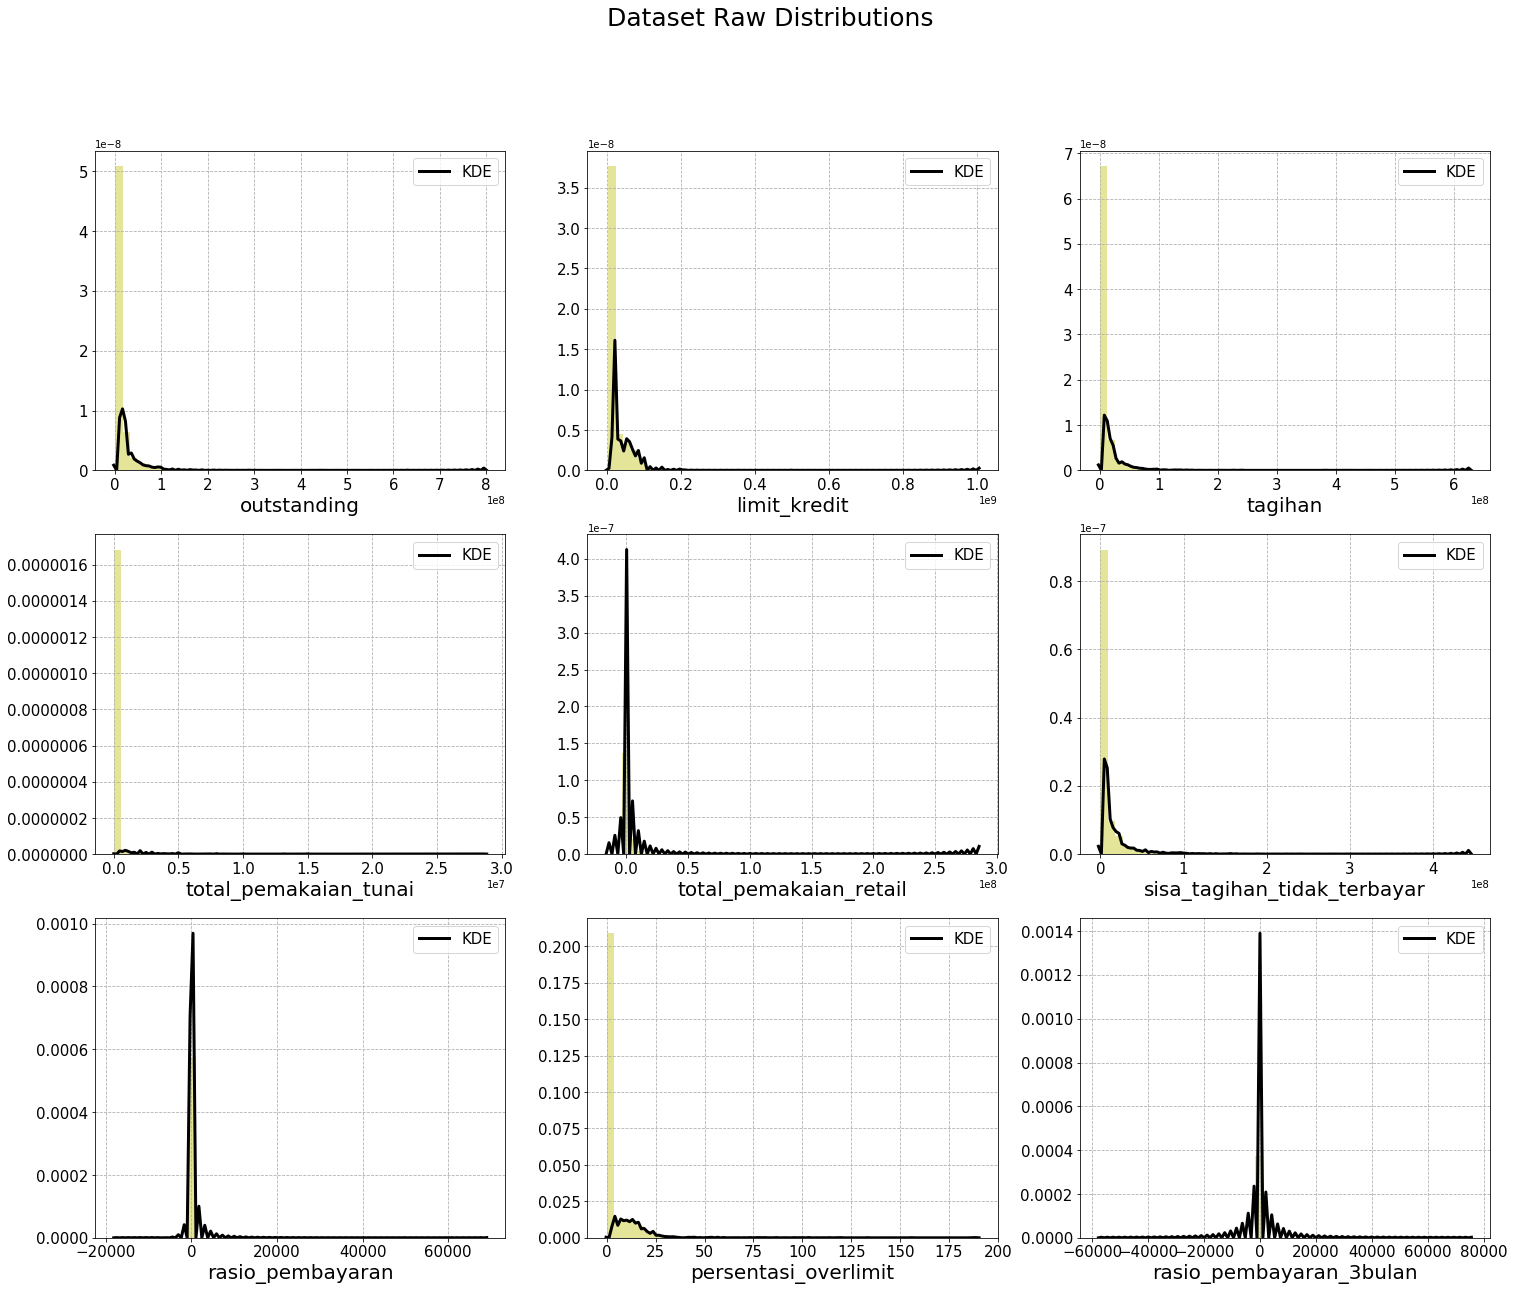

In [6]:
FEATURES_TO_PLOT = ['outstanding', 'limit_kredit', 'tagihan',
                   'total_pemakaian_tunai', 'total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar',
                   'rasio_pembayaran','persentasi_overlimit', 'rasio_pembayaran_3bulan']
distploting(data_train_raw, FEATURES_TO_PLOT, title="Dataset Raw Distributions")

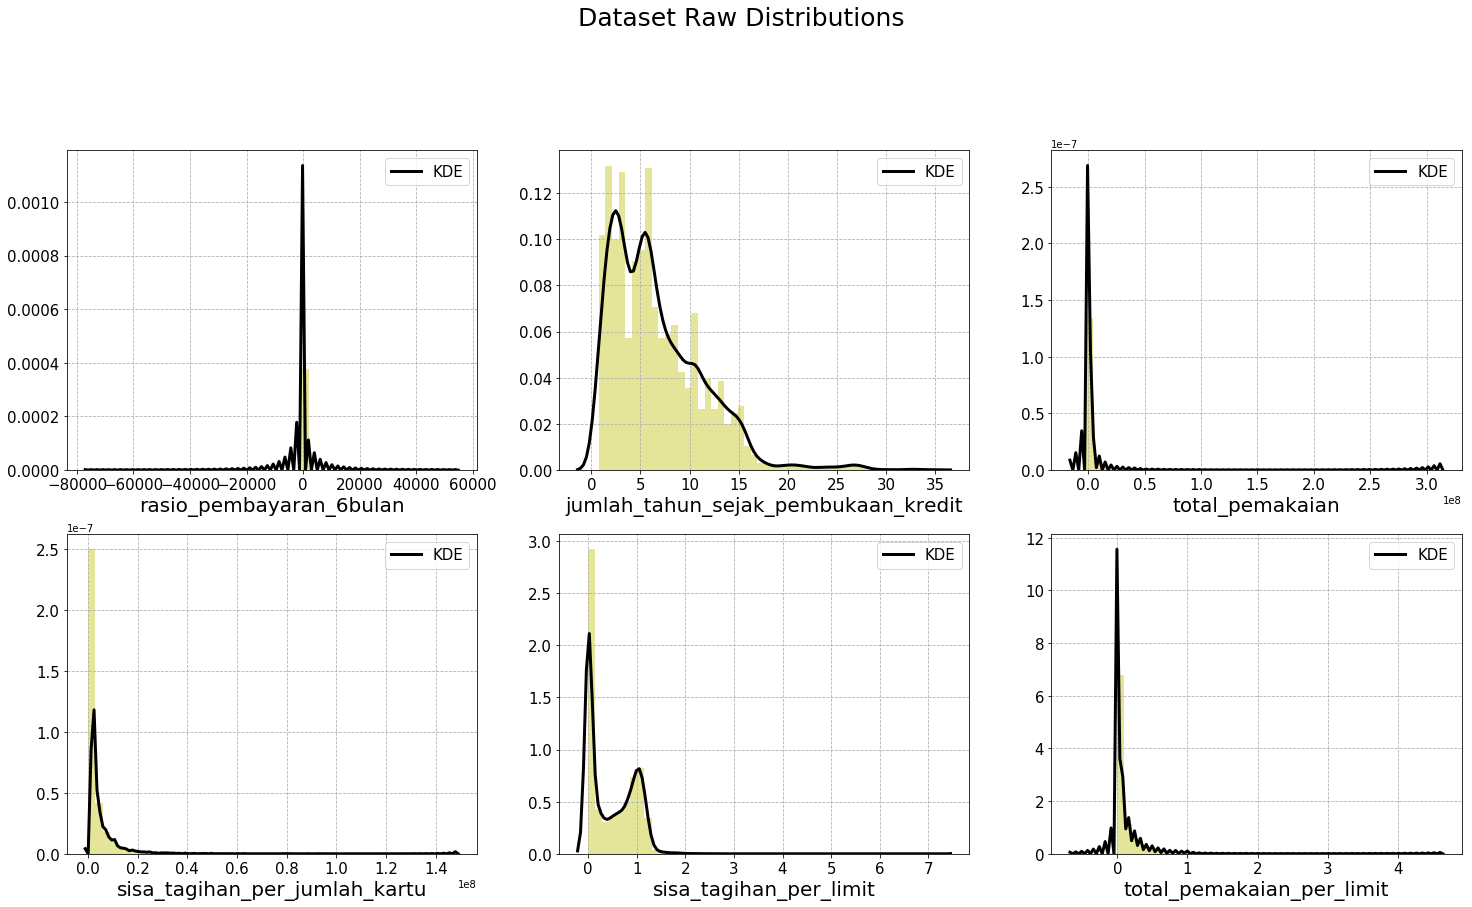

In [7]:
FEATURES_TO_PLOT = ['rasio_pembayaran_6bulan', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian',
                    'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit']
distploting(data_train_raw, FEATURES_TO_PLOT, title="Dataset Raw Distributions")

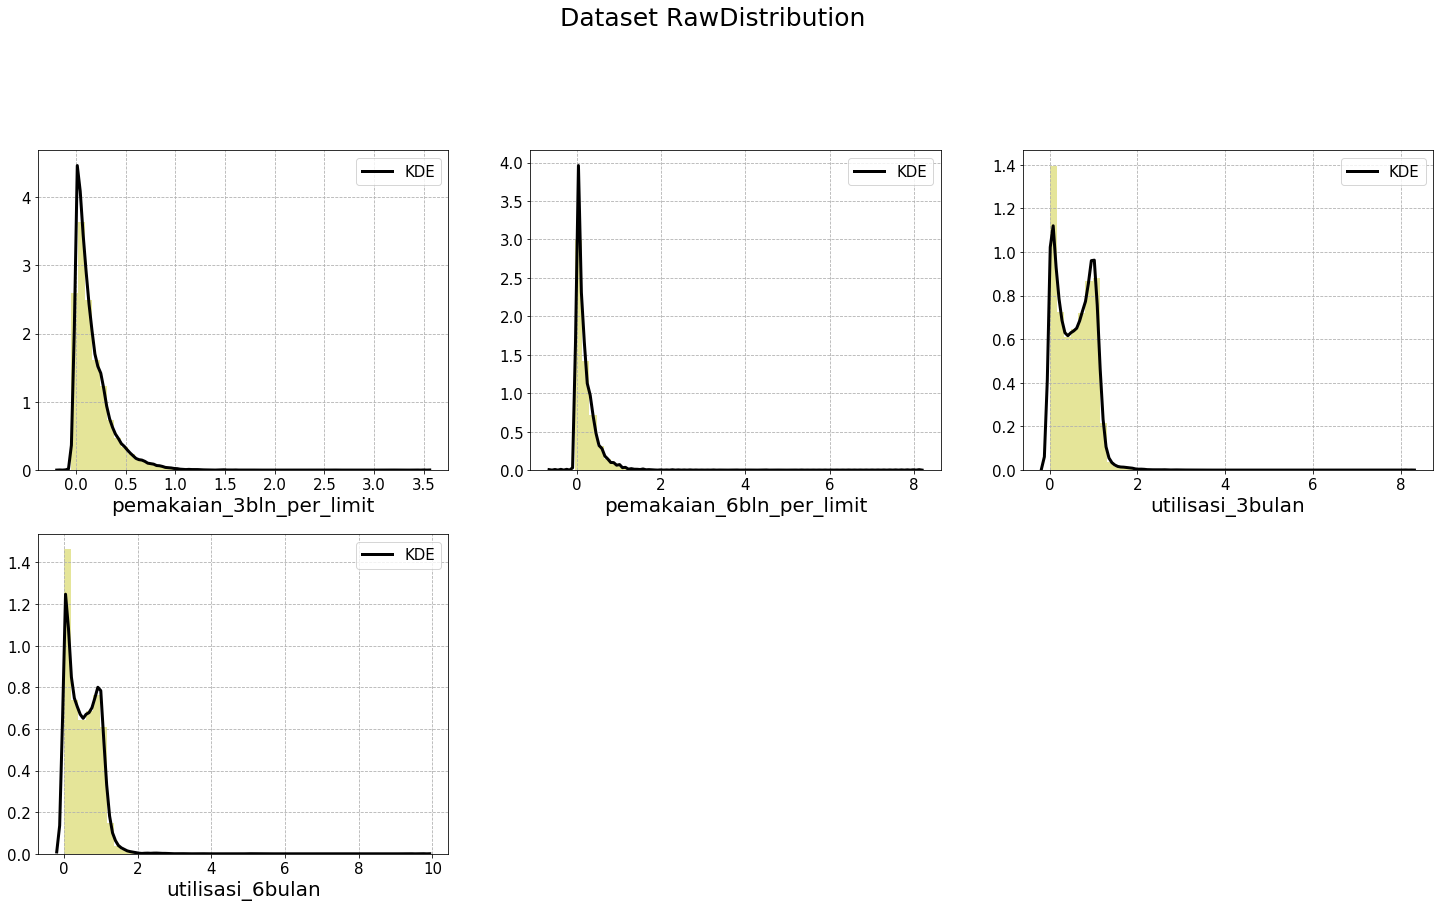

In [8]:
FEATURES_TO_PLOT = ['pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan']
distploting(data_train_raw, FEATURES_TO_PLOT, title="Dataset RawDistribution")

# Scatter Matrix

In [11]:
def plot_scatter_matrix(dataframe, colors):
    plt.figure()
    axs = pd.scatter_matrix(dataframe, figsize=(20,20), c=colors)
    n = len(dataframe.columns)
    for x in range(n):
        for y in range(n):
            ax = axs[x, y] # to get the axis of subplots
            ax.xaxis.label.set_rotation(90) # to make x axis name vertical  
            ax.yaxis.label.set_rotation(0) # to make y axis name horizontal 
            ax.yaxis.labelpad = 80 # to make sure y axis names are outside the plot area
    plt.show()

<Figure size 432x288 with 0 Axes>

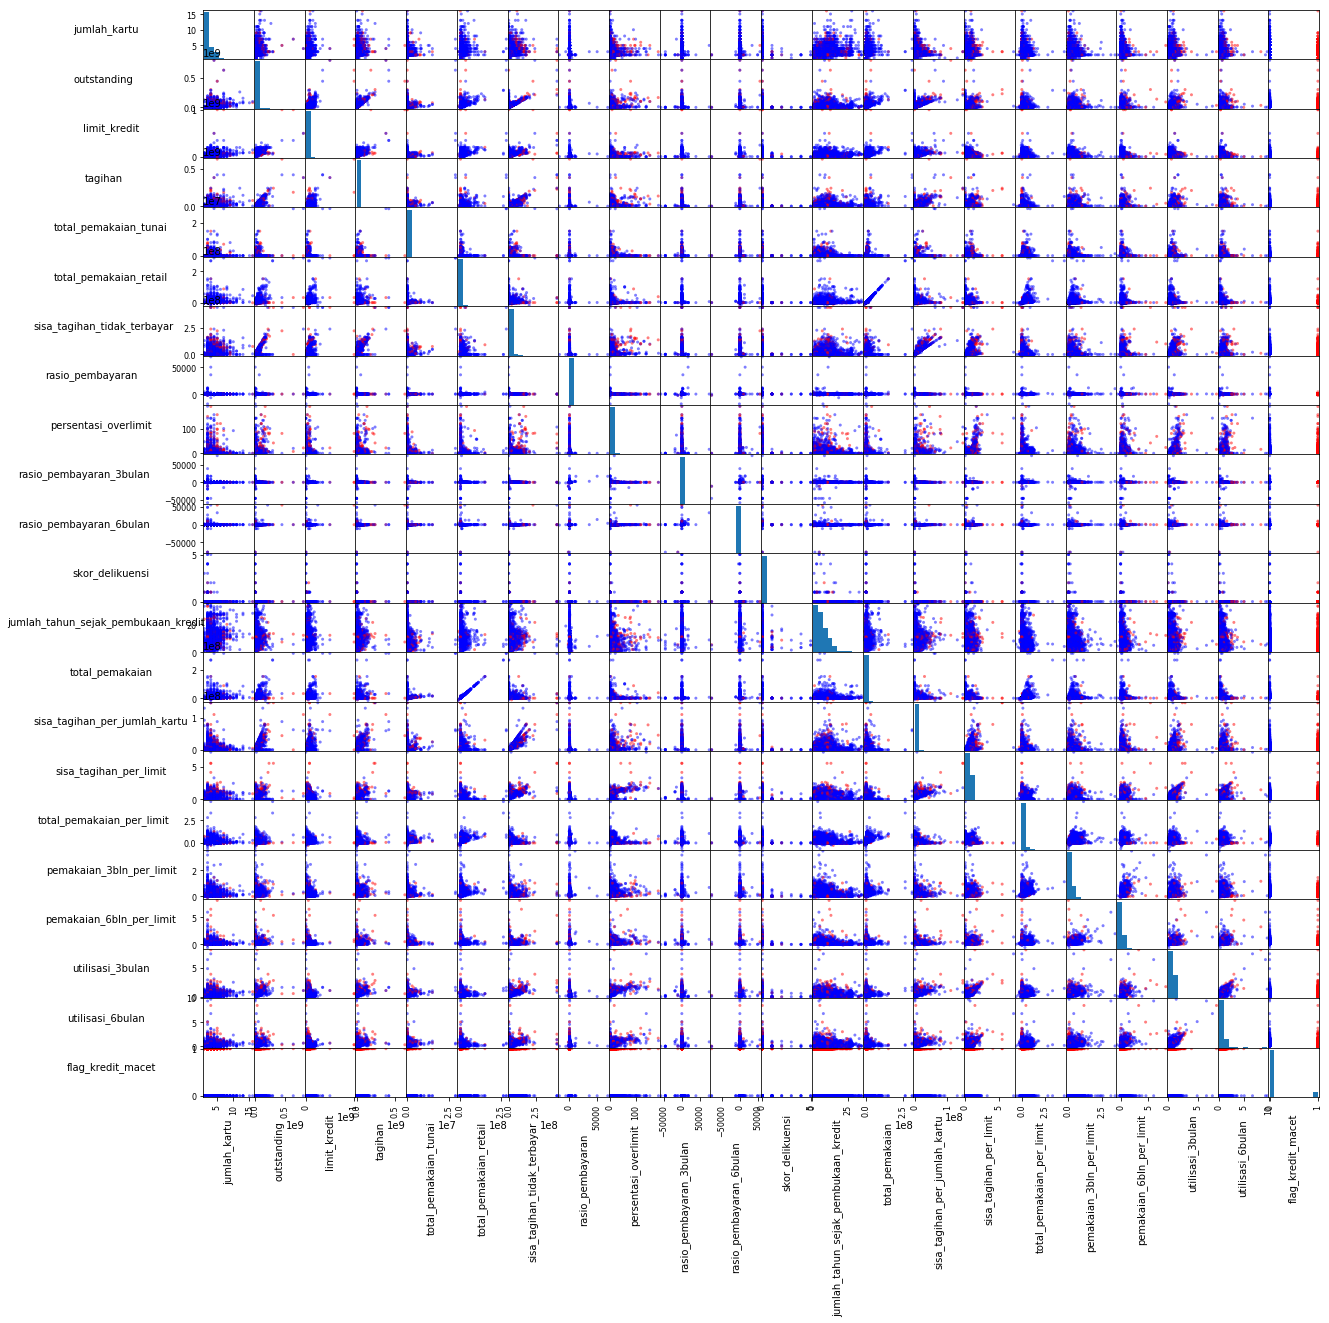

In [12]:
plot_scatter_matrix(data_train_raw.drop('kode_cabang', axis=1), colors=colors)

# Correlation Matrix

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_correlation_matrix(dataframe):           
    
    plt.figure(figsize=(14,13))
    
    ax = sns.heatmap(dataframe, annot=True, vmin=-1, vmax=1, fmt=".1f", square=True, cmap="RdBu", linewidths=0.5)

    labels = dataframe.columns
    ax.set_xticklabels(labels, fontsize = 8, rotation=90, ha='center', minor=False)
    ax.set_yticklabels(labels, fontsize = 8, rotation=0)
    ax.set_xticks(np.arange(dataframe.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(dataframe.shape[0]) + 0.5, minor=False)
    
    plt.title('Correlation Matrix')
    plt.show()

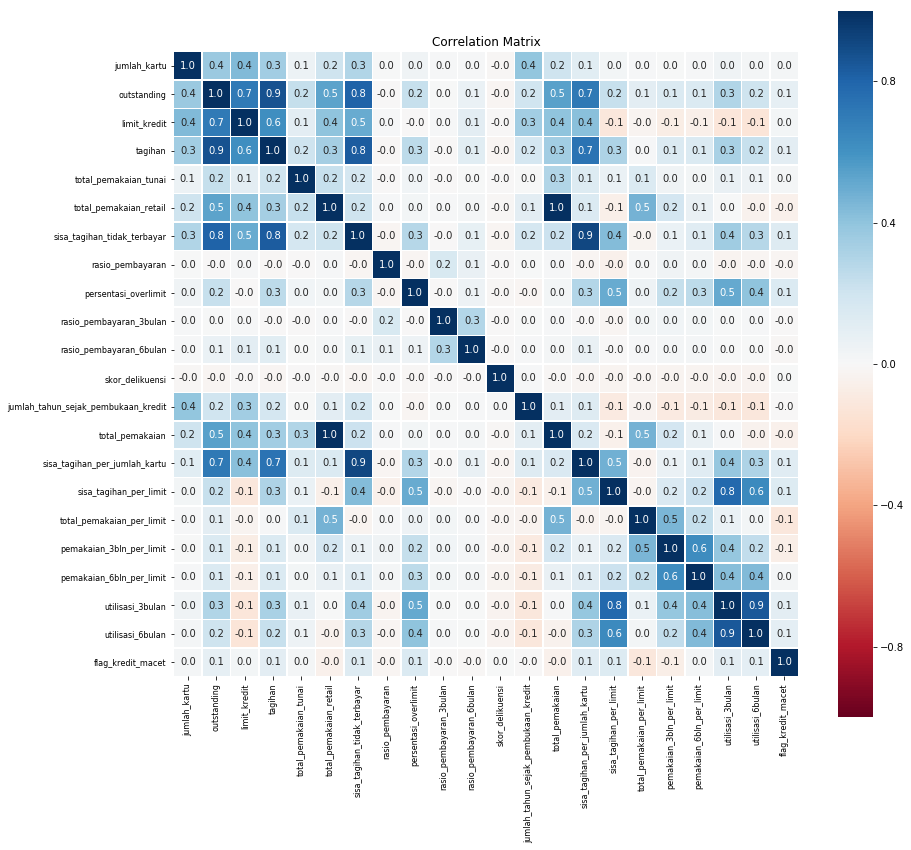

In [14]:
data_train_for_correlation_matrix = data_train_raw.drop('kode_cabang', axis=1) # Drop categorical feature
plot_correlation_matrix(data_train_for_correlation_matrix.corr(method='pearson'))

# Feature Importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y = data_train_raw['flag_kredit_macet']
x = data_train_raw.drop(['flag_kredit_macet'], axis=1)
x = pd.get_dummies(x)

DTC = DecisionTreeClassifier(max_depth=10).fit(x,y)
asd = pd.Series(DTC.feature_importances_, x.columns.values)
asd.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(x=asd.values, y=asd.index)
plt.title('Decision Tree Feature Importance')
plt.show()

# Feature Engineering

In [24]:
from sklearn.preprocessing import StandardScaler

# Drop low importance and highly correlated features
FEATURES_TO_DROP = ['flag_kredit_macet', 'kode_cabang', 'tagihan',
                   'sisa_tagihan_per_limit', 'sisa_tagihan_per_jumlah_kartu',
                   'skor_delikuensi', 'jumlah_kartu']

data_train = data_train_raw.drop(FEATURES_TO_DROP, axis=1)

# Standardize data
columns = data_train.columns
scaler = StandardScaler().fit(data_train)
data_train = scaler.transform(data_train)
data_train = pd.DataFrame(data_train, columns=columns)

In [ ]:
data_train.describe()

# PCA

In [57]:
from sklearn.decomposition import PCA

def plot_pca(dataframe, colors=None, scree_plot=True, loading_plot=False):
    '''
    TODO : complete the loading plot
    '''
    pca = PCA(n_components=len(dataframe.columns))
    principal_components = pca.fit_transform(dataframe)
 
    plt.figure(figsize=(12,12))
    plt.scatter(principal_components[:,0], principal_components[:,1], c=colors, marker='.', alpha=0.1)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA')
    plt.show()
    
    if scree_plot:
        var= pca.explained_variance_ratio_*100 #The amount of variance that each PC explains
        cum_var=np.cumsum(pca.explained_variance_ratio_)*100 #Cumulative Variance explains
        
        # Plot explained variance
        plt.figure(figsize=(12,6))
        plt.bar(range(len(dataframe.columns)), var, fill=False)
        plt.plot(var, color='blue', label='per component')
        plt.scatter(range(len(dataframe.columns)), var, color='blue')
        for i, value in enumerate(var):
            plt.annotate(str(round(value,2))+'%', xy=(i, value), horizontalalignment='center', verticalalignment='bottom')
        
        # Plot cummulative explained variance
        plt.plot(cum_var, color='orange', label='cumulative')
        plt.scatter(range(len(dataframe.columns)), cum_var, color='orange')
        for i, value in enumerate(cum_var):
            plt.annotate(str(round(value,2))+'%', xy=(i, value), horizontalalignment='center', verticalalignment='bottom')

        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance (%)')
        plt.title('Scree Plot')
        plt.legend()
        plt.show()
    
    if loading_plot:
        pass

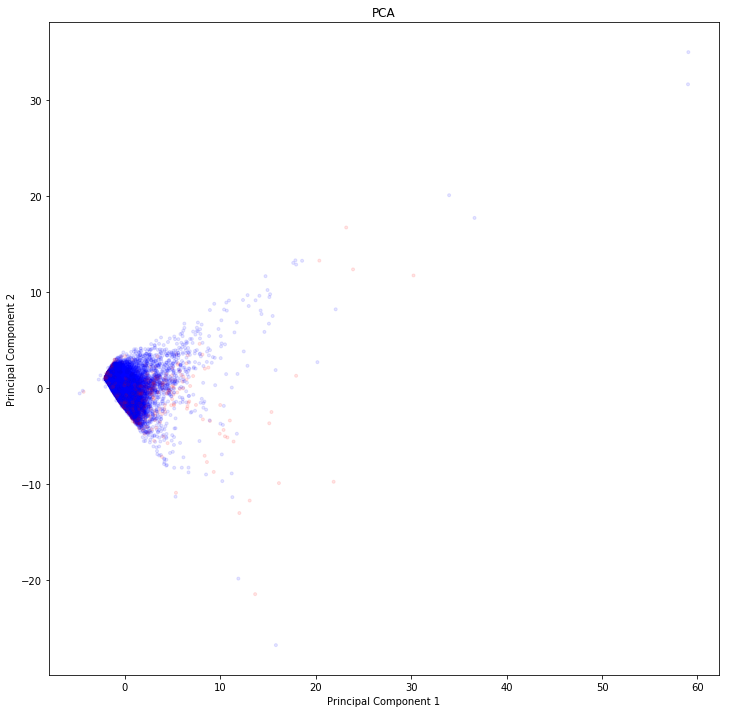

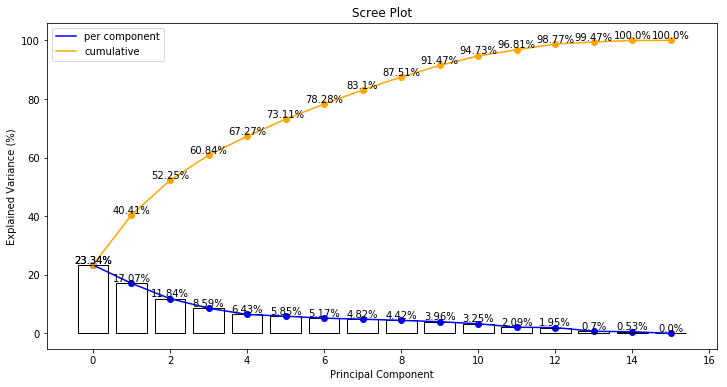

In [58]:
plot_pca(data_train, colors=colors)

# UMAP

### Global structure (n_neighbors=100)

In [ ]:
import umap

reducer = umap.UMAP(init="random", n_neighbors=100)
embedding = reducer.fit_transform(data_train)

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(embedding[:,0], embedding[:,1], c=colors, marker='.', alpha=0.5)
plt.show()

### Local structure (n_neighbors=15)

In [ ]:
import umap

reducer = umap.UMAP(init="random", n_neighbors=15)
embedding = reducer.fit_transform(data_train)

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(embedding[:,0], embedding[:,1], c=colors, marker='.', alpha=0.5)
plt.show()

In [ ]:
import umap

reducer = umap.UMAP(init="random", n_neighbors=10)
embedding = reducer.fit_transform(data_train)

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(embedding[:,0], embedding[:,1], c=colors, marker='.', alpha=0.5)
plt.show()

# T-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=100, n_iter=5000)
tsne_embedding = tsne.fit_transform(data_train)

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(tsne_embedding[:,0], tsne_embedding[:,1], c=colors, marker='.', alpha=0.5)
plt.show()